In [1]:
from runner import *

plotpath = parent_directory + "\\plots\\"
plotting.set_dir(plotpath)

loading process, soma images
loading complete, calculating accuracy
getting human labeled boundaries
complete


### Redo thresholding to show steps

In [2]:
from skimage.morphology import dilation, erosion, closing, opening, disk

imname = 'preprocessed_Probabilities.png'

datafile = datapath + imname
segProbIm = cv2.imread(datafile)

hi = 0.70
lo = 0.25
closerad = 8
dilrad = 5
lorad = 1
minsize = 250
holeMax = 2000
holeMin = 20

im = segProbIm[:, :, 1]

# generate disk filters
closefilter = disk(closerad)
dilfilter = disk(dilrad)
lofilter = disk(lorad)

# threshold dendrites with high and low thresholds
hithresh, hiThresholdedDendrite = cv2.threshold(im, 255 * hi, 255, cv2.THRESH_BINARY)
lothresh, loThresholdedDendrite = cv2.threshold(im, 255 * lo, 255, cv2.THRESH_BINARY)

hibar = np.zeros(hiThresholdedDendrite.shape, dtype=np.int)
lobar = np.zeros(loThresholdedDendrite.shape, dtype=np.int)

hibar[hiThresholdedDendrite > 0] = 1
lobar[loThresholdedDendrite > 0] = 1

# find large holes in high threshold to preserve true holes
holemask = morphology.remove_small_holes(hibar > 0, holeMax) - hibar
holemask = morphology.remove_small_objects(holemask > 0, holeMin)

# remove debris from low threshold
lobardil = morphology.remove_small_objects(lobar > 0, min_size=minsize, connectivity=1)

# close hi threshold to bridge gaps
hibardil = closing(hibar, closefilter)

# smaller dilation to high threshold
hibardil = dilation(hibardil, dilfilter)

g = np.bitwise_and(hibardil > 0, lobardil > 0)
g[holemask > 0] = 0
im = segProbIm[:, :, 2]

hi = 0.9
lo = 0.1
dilrad = 8
holemin = 50

dilfilter = disk(dilrad)

# find high threshold and low threshold
somathresh, hiThresholdedSoma = cv2.threshold(im, 255 * hi, 255, cv2.THRESH_BINARY)
somathresh, loThresholdedSoma = cv2.threshold(im, 255 * lo, 255, cv2.THRESH_BINARY)

hiso = np.zeros(im.shape)
loso = np.zeros(im.shape)

hiso[hiThresholdedSoma > 0] = 1
loso[loThresholdedSoma > 0] = 1

C:\Users\Harrison\AppData\Local\Temp/ipykernel_18500/2868135753.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hibar = np.zeros(hiThresholdedDendrite.shape, dtype=np.int)
C:\Users\Harrison\AppData\Local\Temp/ipykernel_18500/2868135753.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

### make threshold figures

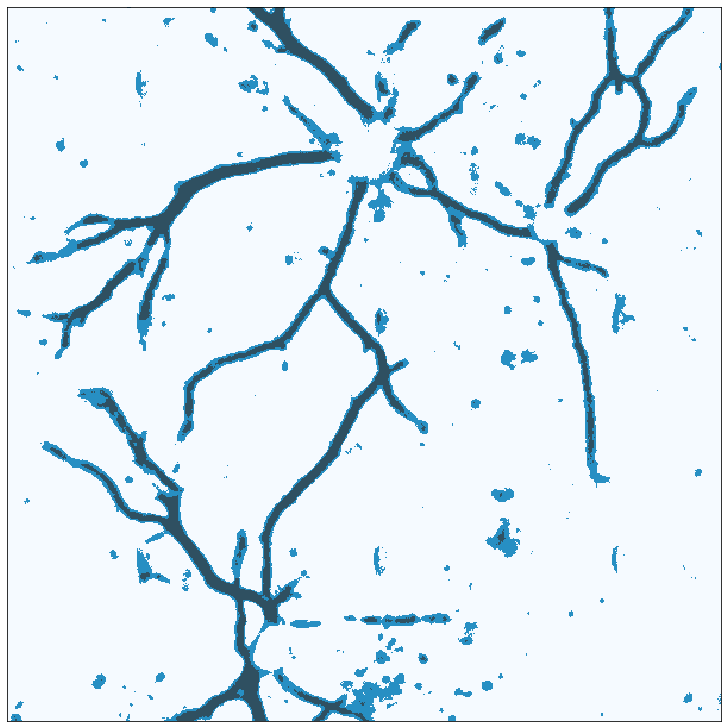

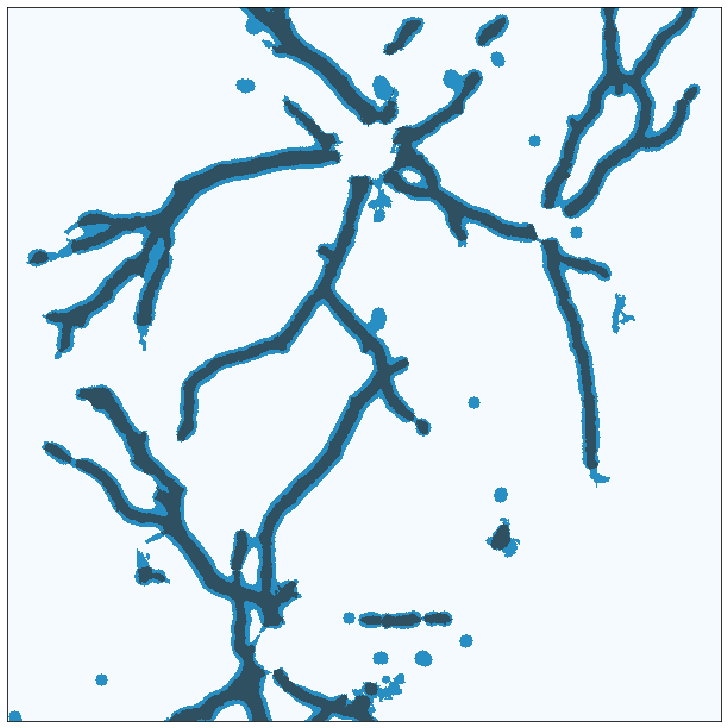

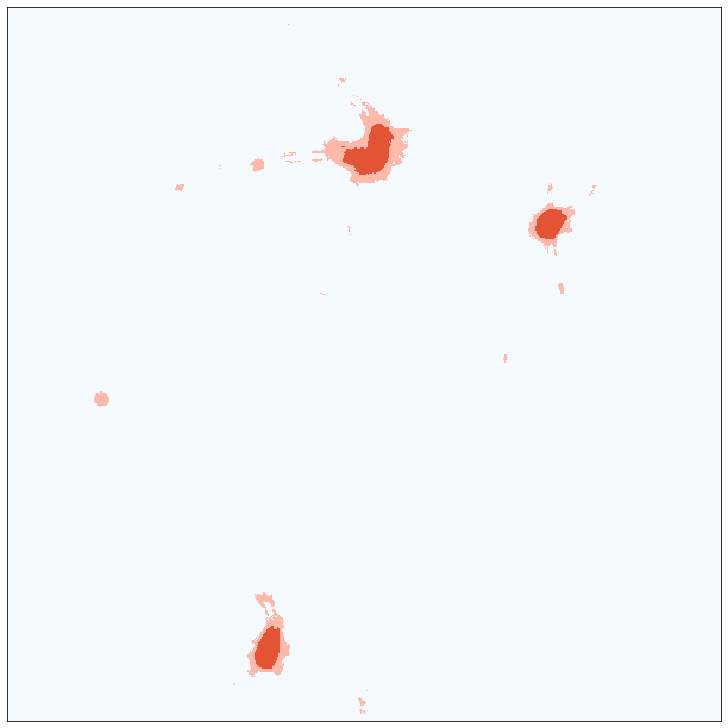

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [3]:
plotting.colorplot(plotting.panel(lobar + hibar, bbox, 1), two_blue, interpolation="None", name="hiandlothresholds")
plotting.colorplot(plotting.panel(lobardil + hibardil, bbox, 1), two_blue, interpolation="None",
                   name="hiandlothresholdsdilated")
plotting.colorplot(plotting.panel(loso + hiso, bbox, 1), two_orange, interpolation="None", name="soma")